In [2]:
!date
!pwd

Чтв Июн 15 17:31:33 MSK 2017
/home/sphere/github/Sphere/separate


 t-SNE — техника нелинейного снижения размерности и визуализации многомерных переменных.
 
 t-SNE это t-distributed stochastic neighbor embedding. Русский вариант с «внедрением соседей» в некоторой мере звучит нелепо, поэтому дальше используется английский акроним.


Алгоритм t-SNE, который также относят к методам множественного обучения признаков, был опубликован в 2008 году (L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008. PDF: http://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) голландским исследователем Лоуренсом ван дер Маатеном (сейчас работает в Facebook AI Research) и чародеем нейронных сетей Джеффри Хинтоном. Классический SNE был предложен Хинтоном и Ровейсом в 2002 (ссылка 2). В статье 2008 года описывается несколько «трюков», которые позволили упростить процесс поиска глобальных минимумов, и повысить качество визуализации. Одним из них стала замена нормального распределения на распределение Стьюдента для данных низкой размерности. Кроме того, была сделана удачная реализация алгоритма (в статье есть ссылка на MatLab), которая потом портировалась в другие популярные среды.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [4]:
datum = pd.read_csv('003Events.dat', index_col=0)
print(datum.shape)
datum[:5]

(1782, 25)


,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10681,D,289,32165,253,239,243,239,687,306.3,2013-03-09 18:29:52,...,25603.580,40419.650,39.0,1.162389,2.477168,1.505545,44.0,45.0,0.594263,1.506814
10683,E,22,505,236,243,472,236,181,305.9,2013-03-09 18:32:54,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066


In [5]:
print(datum.columns)

Index(['Type', 'Dt', 'Atotal', 'TG5time', 'TL2time', 'TL3time', 'TRIGGER',
       'delay', 'H', 'UTC', 'EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s',
       'AbsSignal_n', 'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta',
       'dt2_s', 'dt2_n', 'ng_s', 'ng_n', 'Crit1', 'Crit2'],
      dtype='object')


In [6]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay'] 
len(param)

17

Возьмём упомянутый в статье способ визуализации данных с помощью t-SNE и посмотрим на проекцию нaших данных на плоскость. Bспользуем n_components=2 и random_state=1.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [8]:
datum = pd.read_csv('01Events.dat', index_col=0)
features = len(param)
exdata=datum[param]
events_scaled = StandardScaler().fit_transform(exdata)

In [9]:
%%time
tsne = TSNE(n_components=2, random_state=1)
events_tsne = tsne.fit_transform(events_scaled)

CPU times: user 2.32 s, sys: 844 ms, total: 3.17 s
Wall time: 3.14 s


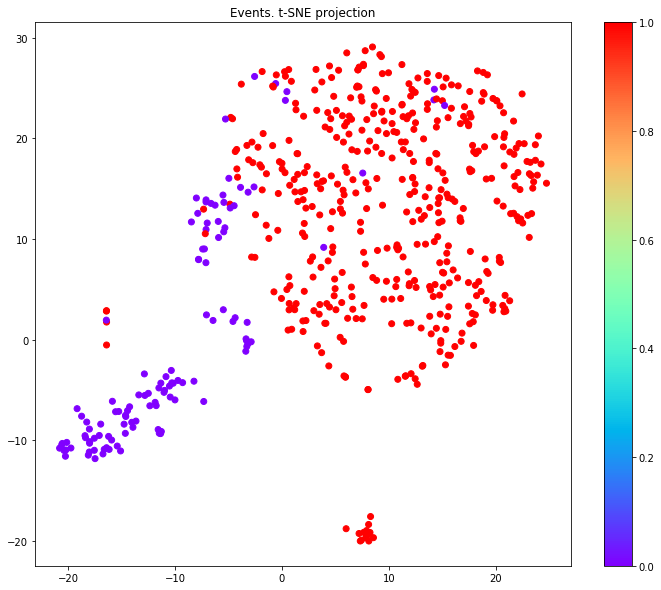

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(events_tsne[:, 0], events_tsne[:, 1], 
            c=datum.EAS, cmap='rainbow')
plt.colorbar();
plt.title('Events. t-SNE projection')

In [11]:
#from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

In [12]:
init_notebook_mode(connected = True)

data = []
trace = go.Scatter(
    x = events_tsne[:, 0],
    y = events_tsne[:, 1],
    #z = datum.index
    mode = 'markers',
    marker = dict(
        size = 10,
        #color = 'rgba(255, 182, 193, .9)',
        color = datum.EAS,
        colorscale='Rainbow',
        line = dict(
            width = 2,),
        showscale=True
        ),
    #color=datum.EAS,
    name = 't-sne',
    text = datum.index
)

data.append(trace)
layout = dict(title = 'Events. t-SNE projection')
fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)

In [13]:
xxx = pd.DataFrame(data =  datum.EAS)
xxx['tsne0'] = events_tsne[:,0]
xxx['tsne1'] = events_tsne[:,1]
xxx.head(4)

,EAS,tsne0,tsne1
EID,,,
10675,1.0,5.447315,0.220209
10677,1.0,16.427069,6.127294
10679,0.0,-2.871773,-0.223912
10683,0.0,-5.507502,14.370960


In [14]:
print(len(xxx[(xxx.tsne0 < -15.0) & (xxx.tsne1 > -2.0)]))
xxx[(xxx.tsne0 < -15.0) & (xxx.tsne1 > -2.0)]

5


,EAS,tsne0,tsne1
EID,,,
10825,1.0,-16.388940,1.738750
11052,1.0,-16.404342,2.828574
11390,1.0,-16.395107,2.874966
11788,1.0,-16.390707,-0.541450
13242,0.0,-16.410849,1.933052


In [15]:
print(len(xxx[(xxx.tsne1 < -15.0)]))
xxx[(xxx.tsne1 < -15.0)]

14


,EAS,tsne0,tsne1
EID,,,
10737,1.0,7.435763,-19.947691
10787,1.0,8.237494,-19.183872
10791,1.0,7.869974,-19.610948
11090,1.0,8.127049,-20.036939
11112,1.0,7.914847,-18.996227
11160,1.0,7.893273,-19.706892
11198,1.0,8.289969,-17.600546
11290,1.0,8.107654,-18.389370
11410,1.0,7.329812,-20.034353


In [16]:
xxx.corr(method='pearson')

,EAS,tsne0,tsne1
EAS,1.000000,0.736266,0.445159
tsne0,0.736266,1.000000,0.451356
tsne1,0.445159,0.451356,1.000000


In [43]:
many = xxx[:]
#many.join(datum, index='EAS')
many = pd.concat([xxx, datum], join='outer', axis=1)
many[:4]

,EAS,tsne0,tsne1,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,1.0,5.447315,0.220209,E,10,688,242,241,242,241,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,1.0,16.427069,6.127294,E,29,1336,241,240,243,240,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,0.0,-2.871773,-0.223912,D,76,7143,242,250,252,242,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10683,0.0,-5.507502,14.370960,E,22,505,236,243,472,236,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066


In [44]:
many.corr(method='pearson')

,EAS,tsne0,tsne1,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EAS,1.000000,0.736266,0.445159,0.046584,-0.123948,0.082581,-0.189185,-0.404503,-0.154589,0.233021,...,-0.248501,-0.119415,0.057092,-0.151192,-0.623955,0.508378,0.058128,-0.584642,0.433283,0.176359
tsne0,0.736266,1.000000,0.451356,0.170497,-0.039425,0.003913,-0.126905,-0.233277,-0.086893,-0.036870,...,-0.146786,-0.022810,0.153475,-0.096411,-0.593190,0.642844,0.160844,-0.542037,0.573456,0.151384
tsne1,0.445159,0.451356,1.000000,-0.119201,-0.365976,0.247271,-0.075343,-0.001162,-0.139680,-0.080853,...,-0.107308,-0.118595,-0.486280,-0.108130,-0.376519,0.183710,-0.487928,-0.584734,0.158181,-0.379500
Dt,0.046584,0.170497,-0.119201,1.000000,0.546531,-0.170347,-0.041592,-0.159893,-0.035476,0.012019,...,0.319067,0.385552,0.269845,0.525216,0.259605,0.161181,0.303359,-0.122760,0.172216,0.174489
Atotal,-0.123948,-0.039425,-0.365976,0.546531,1.000000,-0.194292,-0.013278,-0.115410,0.097320,-0.076391,...,0.218343,0.395077,0.618410,0.222758,0.177166,-0.021275,0.619507,0.304297,0.038137,0.156434
TG5time,0.082581,0.003913,0.247271,-0.170347,-0.194292,1.000000,-0.046662,0.015421,-0.061417,0.060248,...,-0.049234,-0.077443,-0.375945,-0.059628,-0.051636,0.000612,-0.387187,-0.245174,0.042834,-0.029800
TL2time,-0.189185,-0.126905,-0.075343,-0.041592,-0.013278,-0.046662,1.000000,0.193108,0.172545,-0.067084,...,0.029878,0.007545,-0.026941,0.032027,0.100564,-0.176455,-0.018247,0.077969,-0.081605,-0.026965
TL3time,-0.404503,-0.233277,-0.001162,-0.159893,-0.115410,0.015421,0.193108,1.000000,-0.136858,-0.109761,...,-0.022426,-0.058711,-0.188592,0.151573,0.252778,-0.143341,-0.172833,0.023543,-0.077998,-0.108813
TRIGGER,-0.154589,-0.086893,-0.139680,-0.035476,0.097320,-0.061417,0.172545,-0.136858,1.000000,-0.093815,...,0.244917,0.165868,0.196010,-0.118742,-0.049217,-0.247316,0.188938,0.270371,-0.216623,0.020132
delay,0.233021,-0.036870,-0.080853,0.012019,-0.076391,0.060248,-0.067084,-0.109761,-0.093815,1.000000,...,-0.036068,-0.007857,-0.101953,0.032615,-0.106837,0.060169,-0.102979,-0.202050,0.038783,0.034296
